<a href="https://colab.research.google.com/github/eyamilabraham/convolutional-neural-networks-numbers-mode-2-using-RNC/blob/main/convolutional_neural_networks_numbers_mode_2_(using_RNC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow as tf
import tensorflow_datasets as tfds

#Downloading MNIST dataset (handwritten numbers, labeled)
data, metadata = tfds.load('mnist', as_supervised=True, with_info=True)

#Splitting variables of training (60k) and testing (10k)
data_training, data_testing = data['train'], data['test']

#Normalizing metadata (transforming from 0-255 to 0-1)
#The network learns better and faster
def normalize(pictures, labels):
  pictures = tf.cast(pictures, tf.float32)
  pictures /= 255 #Transforming from 0-255 to 0-1
  return pictures, labels

#Normalize metadata of training and testing with the above function
data_training = data_training.map(normalize)
data_testing = data_testing.map(normalize)

#Adding to cache (you have to use RAM in case of HDD or SSD, faster training)
data_training = data_training.cache()
data_testing = data_testing.cache()

classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

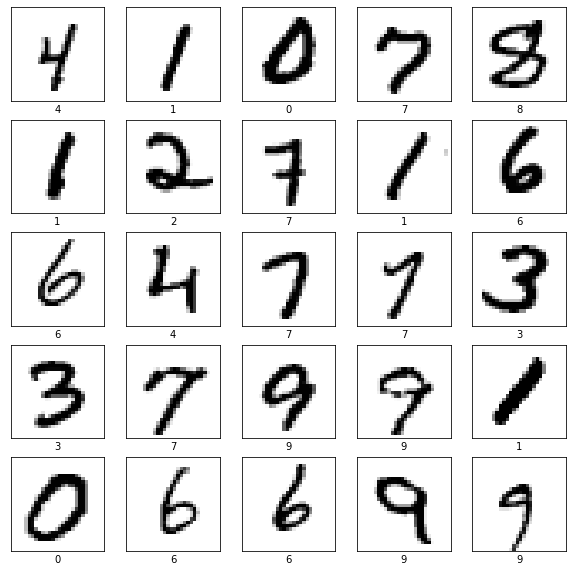

In [13]:
#Code to display pictures from dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i, (picture, label) in enumerate(data_training.take(25)):
  picture = picture.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(picture, cmap=plt.cm.binary)
  plt.xlabel(classes[label])

plt.show()  

In [14]:
#Creating the model (dense model, regular, without convolutional neural networks yet)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), #2,2 size of the matrix

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), #2,2 size of the matrix

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Compiling the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [15]:
#Splitting training and testing data (60k y 10k)
num_data_training = metadata.splits["train"].num_examples
num_data_testing = metadata.splits["test"].num_examples

#Batch work allows training with large amount of data to be done more efficiently
SIZE_BATCH = 32

#Shuffle y repeat data are randomly shuffled so that the network not learns the right way of the things
data_training = data_training.repeat().shuffle(num_data_training).batch(SIZE_BATCH)
data_testing = data_testing.batch(SIZE_BATCH)

In [16]:
#Training
import math

history = model.fit(
    data_training,
    epochs=60,
    steps_per_epoch=math.ceil(num_data_training/SIZE_BATCH)
)

Epoch 1/60
1875/1875 [==============================] - 27s 6ms/step - loss: 0.1291 - accuracy: 0.9599
Epoch 2/60
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0418 - accuracy: 0.9869
Epoch 3/60
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0292 - accuracy: 0.9909
Epoch 4/60
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0202 - accuracy: 0.9934
Epoch 5/60
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0154 - accuracy: 0.9949
Epoch 6/60
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0125 - accuracy: 0.9960
Epoch 7/60
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0101 - accuracy: 0.9969
Epoch 8/60
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0079 - accuracy: 0.9976
Epoch 9/60
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0072 - accuracy: 0.9974
Epoch 10/60
1875/1875 [==============================] - 11s 6ms/step - l

In [17]:
#Exporting the h5 model
model.save('conv_numbers.h5')

#Transforming to tensorflow.js
!pip install tensorflowjs

!mkdir folder_output

!tensorflowjs_converter --input_format keras regular_numbers.h5 folder_output

     |████████████████████████████████| 77 kB 3.5 MB/s 
Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
  File "/usr/local/lib/python3.7/dist-packages/tensorflowjs/converters/converter.py", line 813, in pip_main
    main([' '.join(sys.argv[1:])])
  File "/usr/local/lib/python3.7/dist-packages/tensorflowjs/converters/converter.py", line 817, in main
    convert(argv[0].split(' '))
  File "/usr/local/lib/python3.7/dist-packages/tensorflowjs/converters/converter.py", line 804, in convert
    weight_shard_size_bytes, metadata_map)
  File "/usr/local/lib/python3.7/dist-packages/tensorflowjs/converters/converter.py", line 501, in _dispatch_converter
    metadata=metadata_map)
  File "/usr/local/lib/python3.7/dist-packages/tensorflowjs/converters/converter.py", line 76, in dispatch_keras_h5_to_tfjs_layers_model_conversion
    raise ValueError('Nonexistent path to HDF5 file: %s' % h5_path)
ValueError: Nonexistent p